# Предобработка

In [146]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [147]:
df = pd.read_csv("datasets/students_dropout_academic_success.csv")
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [148]:
df.isna().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [149]:
df.duplicated().sum()

0

In [150]:
df.nunique()

Marital Status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [151]:
df.target.value_counts()

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Модели плохо работают с таким дисбалансом, делаем апсемплинг

In [152]:
from sklearn.utils import resample

In [153]:
df_enrolled = df[df['target'] == 'Enrolled']
df_dropout = df[df['target'] == 'Dropout']
df_graduate = df[df['target'] == 'Graduate']

In [154]:
n_samples = len(df_enrolled)

df_dropout_down = resample(df_dropout, replace=False, n_samples=n_samples, random_state=42)
df_graduate_down = resample(df_graduate, replace=False, n_samples=n_samples, random_state=42)

In [155]:

df_balanced = pd.concat([df_enrolled, df_dropout_down, df_graduate_down])

In [156]:
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [157]:
df.target.value_counts()

target
Graduate    794
Dropout     794
Enrolled    794
Name: count, dtype: int64

In [158]:
target = df.target
df.drop('target', axis=1, inplace=True)

In [159]:
cont = ['Previous qualification (grade)',
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)']

In [160]:
categ = [col for col in df.columns if col not in cont]
categ

['Marital Status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [161]:
nunique_list = df[categ].nunique()
nunique_list

Marital Status                                     6
Application mode                                  16
Application order                                  7
Course                                            17
Daytime/evening attendance                         2
Previous qualification                            16
Nacionality                                       18
Mother's qualification                            24
Father's qualification                            30
Mother's occupation                               30
Father's occupation                               40
Displaced                                          2
Educational special needs                          2
Debtor                                             2
Tuition fees up to date                            2
Gender                                             2
Scholarship holder                                 2
International                                      2
Curricular units 1st sem (credited)           

In [162]:
from sklearn.preprocessing import LabelEncoder

In [163]:
# бинарные признаки обработаны отдельно
binary_cols = [col for col in categ if nunique_list[col] == 2]

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [164]:
# Для признаков с низкой кардинальностью (3-10 уникальных знач)
categ_dummies = [col for col in categ if 3 <= nunique_list[col] <= 10]

df = pd.get_dummies(df, columns=categ_dummies, drop_first=True)

In [165]:
# Частотное кодирование для остальных
categ_freq = [col for col in categ if nunique_list[col] > 10]

for col in categ_freq:
    freq = df[col].value_counts(normalize=True)
    df[col + '_freq'] = df[col].map(freq)
    df.drop(col, axis=1, inplace=True)

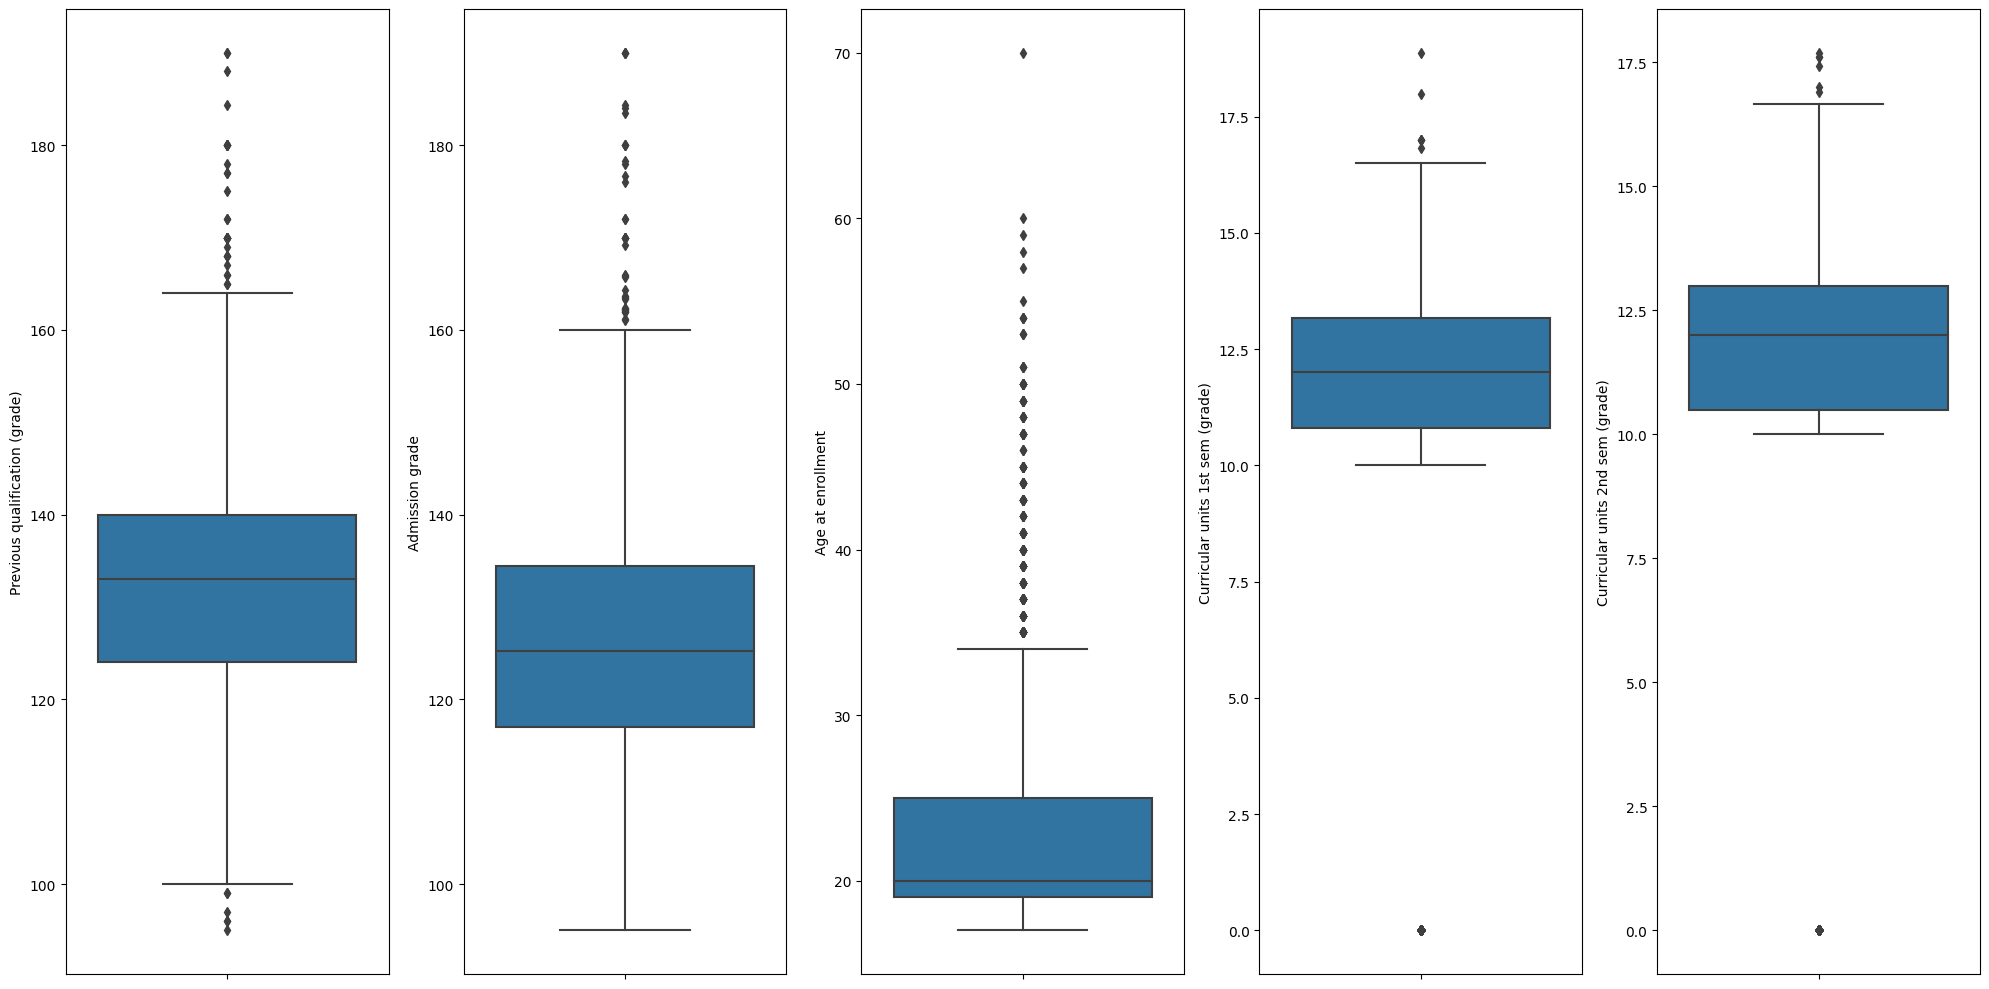

In [166]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [167]:
from sklearn.preprocessing import QuantileTransformer

In [168]:
qt = QuantileTransformer(n_quantiles=10, random_state=0) 
df[cont] = qt.fit_transform(df[cont])

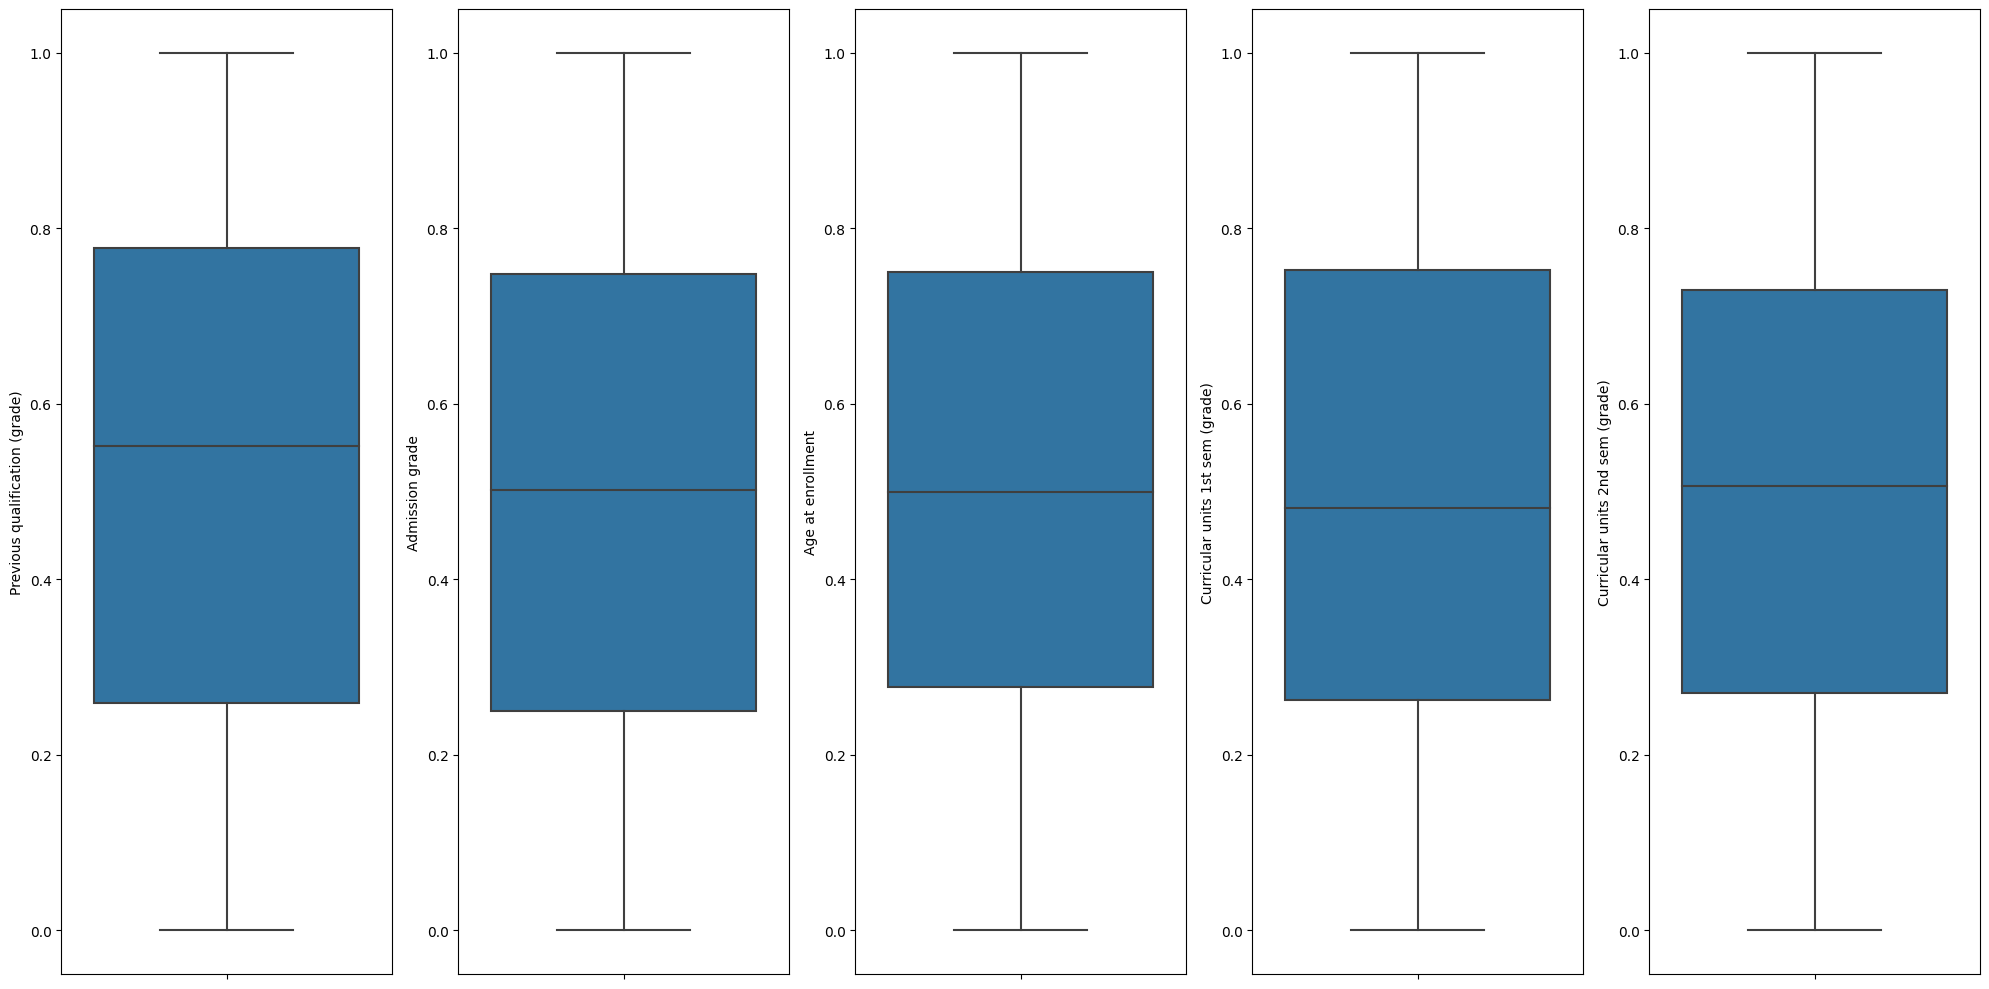

In [169]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

<Axes: >

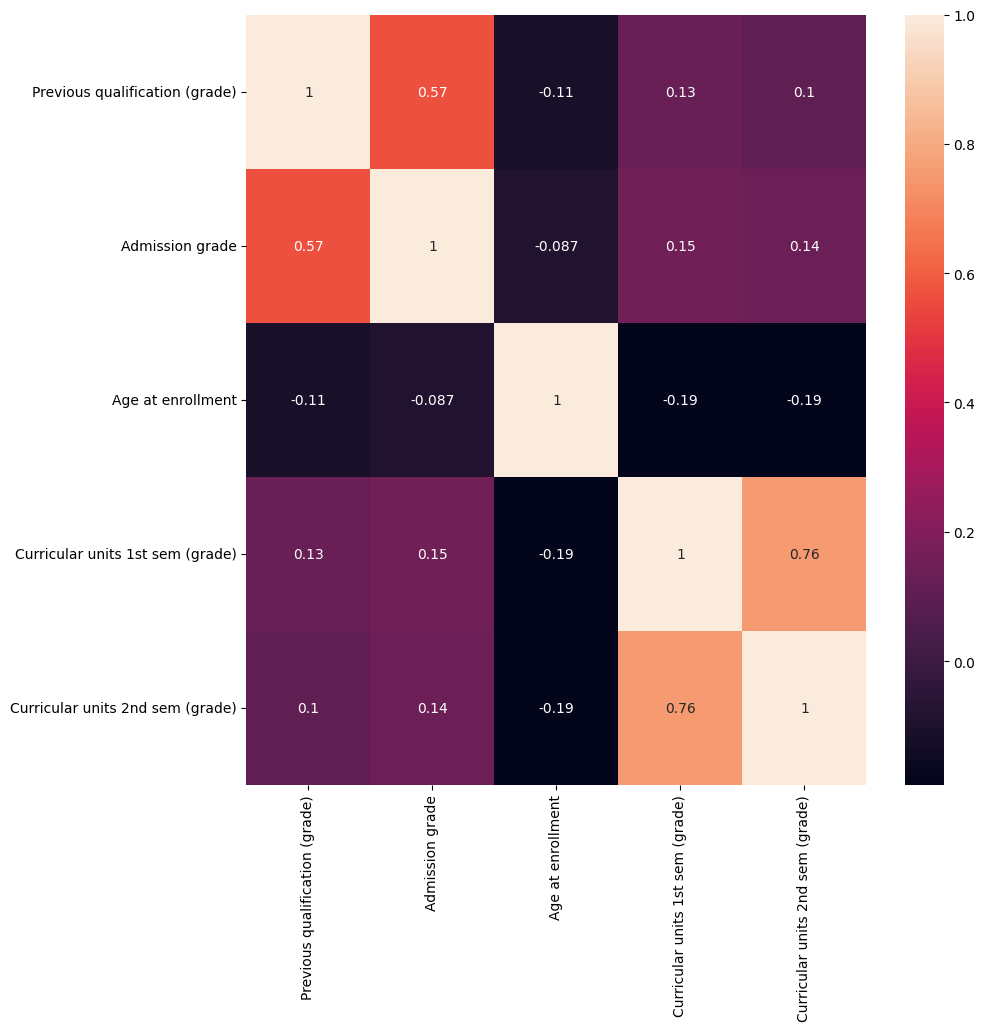

In [170]:
corr = df[cont].corr()
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(corr,  annot=True, ax=ax)

In [171]:
corr

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
Previous qualification (grade),1.000000,0.567372,-0.113209,0.127573,0.103004
Admission grade,0.567372,1.000000,-0.086757,0.153956,0.138975
Age at enrollment,-0.113209,-0.086757,1.000000,-0.186770,-0.190830
Curricular units 1st sem (grade),0.127573,0.153956,-0.186770,1.000000,0.757070
Curricular units 2nd sem (grade),0.103004,0.138975,-0.190830,0.757070,1.000000


In [172]:
df['Average_grade'] = df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)
df.drop(['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'], axis=1, inplace=True)

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Логистическая регрессия

In [175]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [176]:
cls_log_l1 = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=1000)
cls_log_l2 = LogisticRegressionCV(penalty='l2', solver='lbfgs', max_iter=1000)

In [177]:
l1_rat = np.linspace(0.1, 0.9, 3) 
cls_log_l12 = LogisticRegressionCV(penalty='elasticnet', solver='saga', max_iter=5000, l1_ratios=l1_rat, n_jobs=-1, cv=3, tol=1e-3,)

In [178]:
cls_log_l1.fit(X_train, y_train);

C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [179]:
cls_log_l2.fit(X_train, y_train);

In [180]:
cls_log_l12.fit(X_train, y_train);

In [181]:
cls_log_l1.score(X_test, y_test)

0.6540880503144654

In [182]:
cls_log_l2.score(X_test, y_test)

0.6457023060796646

In [183]:
cls_log_l12.score(X_test, y_test)

0.6519916142557652

In [184]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [278]:
classes = ['Dropout', 'Enrolled', 'Graduate']

              precision    recall  f1-score   support

     Dropout       0.75      0.68      0.71       173
    Enrolled       0.56      0.55      0.56       159
    Graduate       0.66      0.74      0.69       145

    accuracy                           0.65       477
   macro avg       0.65      0.66      0.65       477
weighted avg       0.66      0.65      0.65       477



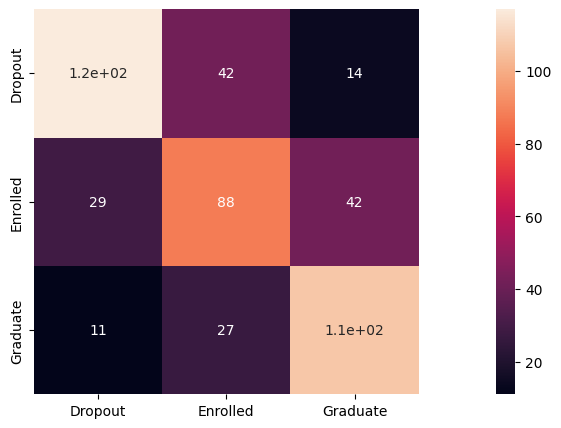

In [280]:
y_pred = cls_log_l1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.71      0.68      0.70       173
    Enrolled       0.56      0.55      0.56       159
    Graduate       0.66      0.70      0.68       145

    accuracy                           0.65       477
   macro avg       0.64      0.65      0.65       477
weighted avg       0.65      0.65      0.65       477



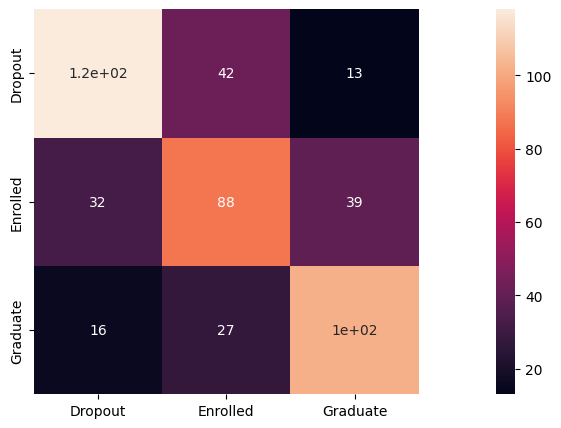

In [281]:
y_pred = cls_log_l2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.74      0.68      0.71       173
    Enrolled       0.56      0.55      0.56       159
    Graduate       0.65      0.73      0.69       145

    accuracy                           0.65       477
   macro avg       0.65      0.65      0.65       477
weighted avg       0.65      0.65      0.65       477



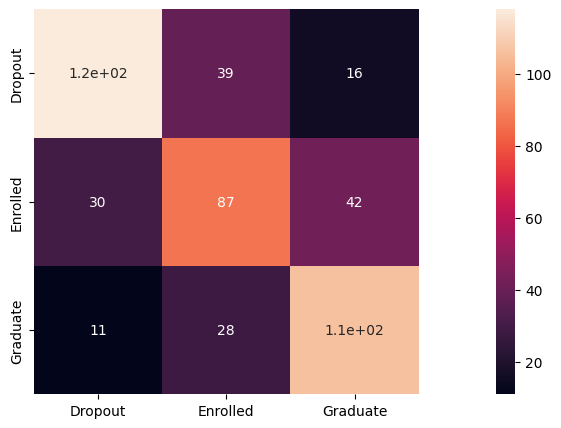

In [282]:
y_pred = cls_log_l12.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

In [199]:
cls_log_l2_reweighted = LogisticRegressionCV(penalty='l2',solver='lbfgs',max_iter=3000,
                                  class_weight={'Graduate': 1.0,
                                                'Dropout': 0.9784,
                                                'Enrolled': 1.0225})

In [200]:
y_test.value_counts()

target
Dropout     173
Enrolled    159
Graduate    145
Name: count, dtype: int64

In [201]:
from sklearn.utils.class_weight import compute_class_weight

In [202]:
classes = y_train.unique()
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
class_weights

{'Enrolled': 1.0,
 'Graduate': 0.9784283513097073,
 'Dropout': 1.0225442834138487}

In [203]:
cls_log_l2_reweighted.fit(X_train, y_train);
cls_log_l2_reweighted.score(X_test, y_test)

0.6436058700209644

              precision    recall  f1-score   support

     Dropout       0.71      0.67      0.69       173
    Enrolled       0.56      0.56      0.56       159
    Graduate       0.67      0.70      0.68       145

    accuracy                           0.64       477
   macro avg       0.64      0.64      0.64       477
weighted avg       0.64      0.64      0.64       477



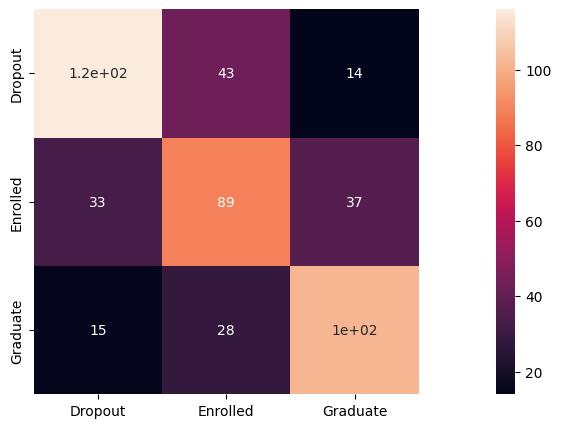

In [283]:
y_pred = cls_log_l2_reweighted.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

# Нелинейная классификация

In [205]:
from sklearn.svm import SVC

In [206]:
cls_svc = SVC(kernel='rbf', degree=3, gamma='scale', C=1.0, probability=True, class_weight='balanced')

In [207]:
cls_svc.fit(X_train,y_train);
cls_svc.score(X_test,y_test)

0.6373165618448637

              precision    recall  f1-score   support

     Dropout       0.73      0.68      0.70       173
    Enrolled       0.54      0.58      0.56       159
    Graduate       0.65      0.64      0.64       145

    accuracy                           0.64       477
   macro avg       0.64      0.64      0.64       477
weighted avg       0.64      0.64      0.64       477



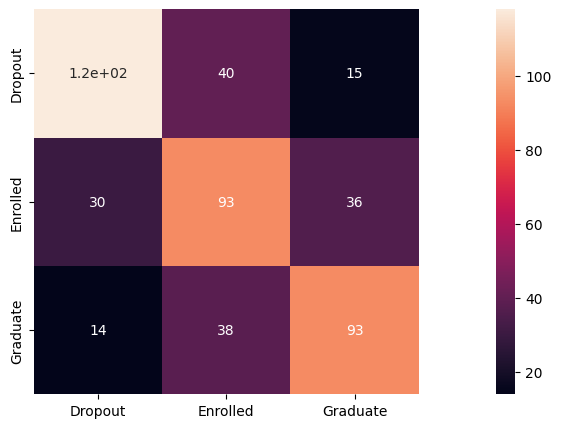

In [284]:
y_pred = cls_svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

# Нейронная сеть

In [210]:
from sklearn import neural_network

In [211]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(128,), (64, 32), (128, 64)],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [4, 16, 32],
}
mlp = neural_network.MLPClassifier(max_iter=10000, early_stopping=True)
grid = GridSearchCV(mlp, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)


Best params: {'alpha': 0.0001, 'batch_size': 32, 'hidden_layer_sizes': (128,)}


In [213]:
cls_mlp = neural_network.MLPClassifier(hidden_layer_sizes=(128,),
                                      alpha=0.0001,
                                      max_iter=10000,
                                      batch_size=4,
                                      early_stopping=True
                                      )

In [214]:
cls_mlp.fit(X_train,y_train);
cls_mlp.score(X_test,y_test)

0.6352201257861635

              precision    recall  f1-score   support

     Dropout       0.78      0.63      0.70       173
    Enrolled       0.59      0.50      0.54       159
    Graduate       0.56      0.79      0.66       145

    accuracy                           0.64       477
   macro avg       0.65      0.64      0.63       477
weighted avg       0.65      0.64      0.63       477



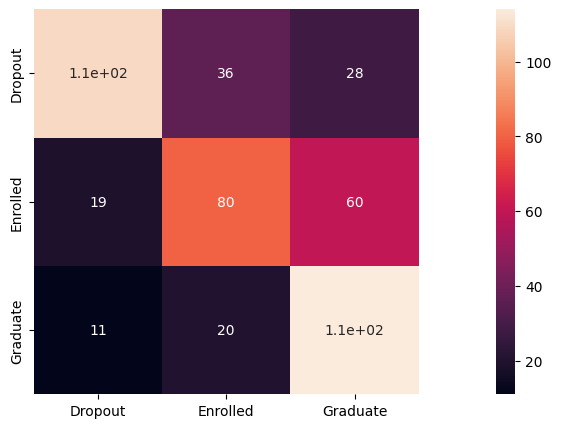

In [285]:
y_pred = cls_mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

# KNN

In [216]:
from sklearn import neighbors

In [217]:
scores = []
n_max = 20
for i in range(1, n_max + 1):
  reg_knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance', p=1)
  reg_knn.fit(X_train, y_train);
  scores.append(reg_knn.score(X_test, y_test))

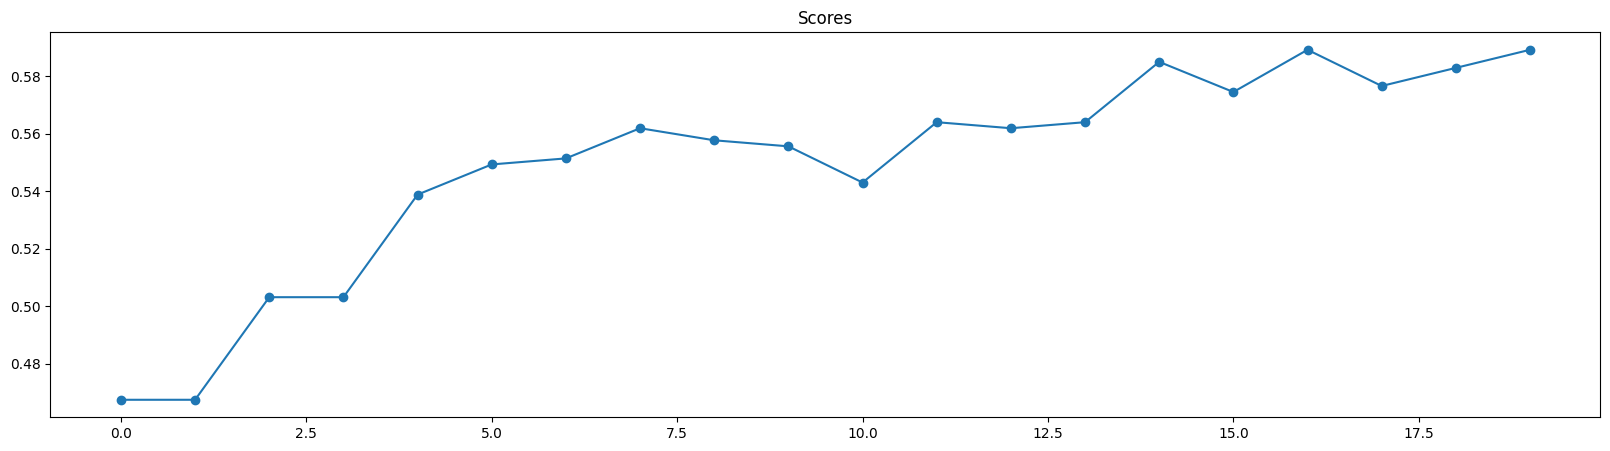

In [218]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(scores,'-o')
plt.title('Scores')
plt.show()

In [233]:
cls_knn = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance', p=1)

In [234]:
cls_knn.fit(X_train, y_train);
cls_knn.score(X_test,y_test)

0.5849056603773585

              precision    recall  f1-score   support

     Dropout       0.76      0.49      0.60       173
    Enrolled       0.48      0.57      0.52       159
    Graduate       0.59      0.71      0.64       145

    accuracy                           0.58       477
   macro avg       0.61      0.59      0.59       477
weighted avg       0.61      0.58      0.59       477



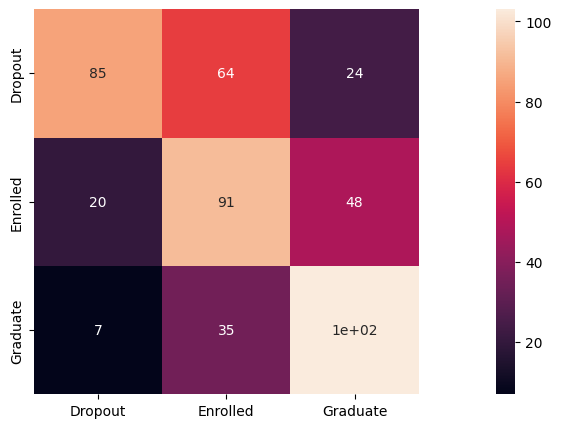

In [286]:
y_pred = cls_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

# Наивный Байес

In [237]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [238]:
cls_gauss_nb = GaussianNB()
cls_mult_nb = MultinomialNB()

In [239]:
cls_gauss_nb.fit(X_train, y_train);
cls_gauss_nb.score(X_test, y_test)

0.389937106918239

              precision    recall  f1-score   support

     Dropout       0.75      0.23      0.35       173
    Enrolled       0.23      0.04      0.07       159
    Graduate       0.35      0.97      0.52       145

    accuracy                           0.39       477
   macro avg       0.45      0.41      0.31       477
weighted avg       0.46      0.39      0.31       477



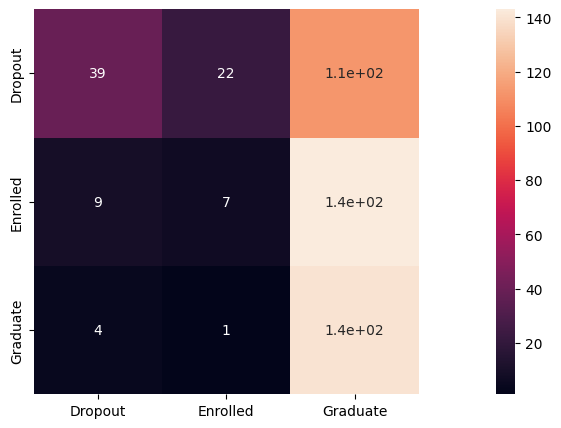

In [287]:
y_pred = cls_gauss_nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

In [242]:
cls_mult_nb.fit(X_train, y_train);
cls_mult_nb.score(X_test, y_test)

0.4758909853249476

              precision    recall  f1-score   support

     Dropout       0.55      0.53      0.54       173
    Enrolled       0.37      0.37      0.37       159
    Graduate       0.50      0.53      0.52       145

    accuracy                           0.48       477
   macro avg       0.47      0.48      0.48       477
weighted avg       0.48      0.48      0.48       477



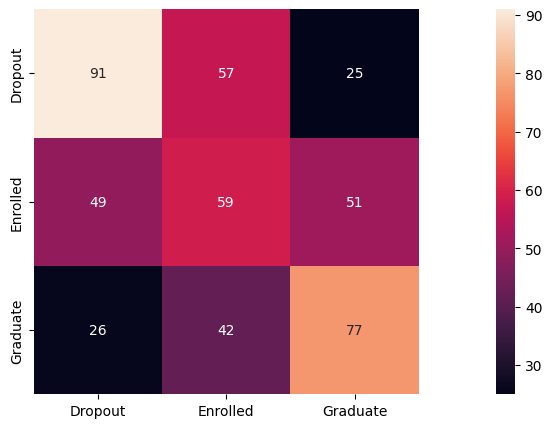

In [288]:
y_pred = cls_mult_nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

# ROC кривые

In [244]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

In [245]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(477, 3)

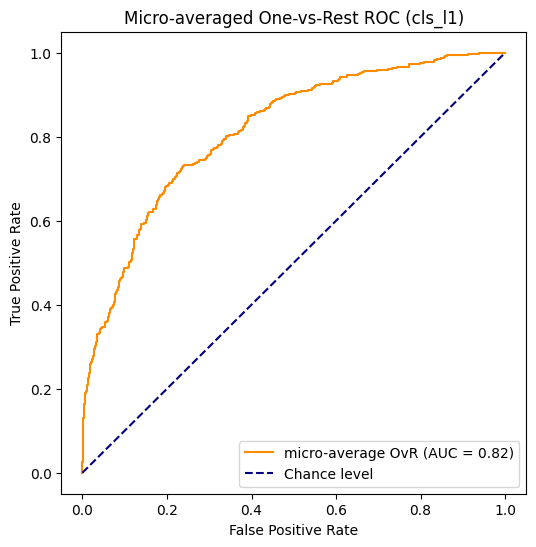

In [256]:
y_score = cls_log_l1.predict_proba(X_test)
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Chance level')
plt.gcf().set_size_inches(6, 6)

display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest ROC (cls_l1)",
)
plt.legend()

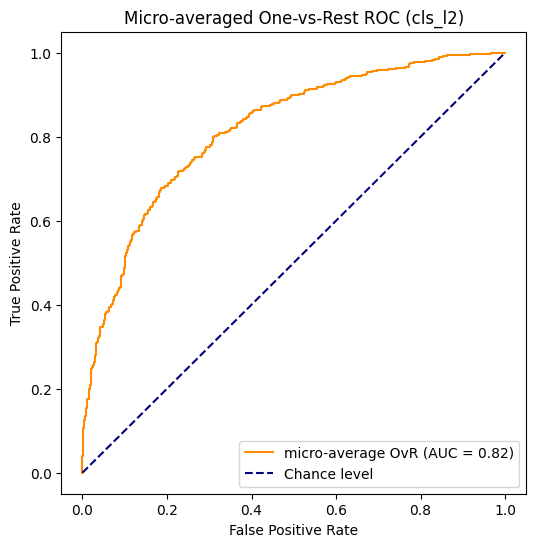

In [257]:
y_score = cls_log_l2.predict_proba(X_test)
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Chance level')
plt.gcf().set_size_inches(6, 6)

display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest ROC (cls_l2)",
)
plt.legend()

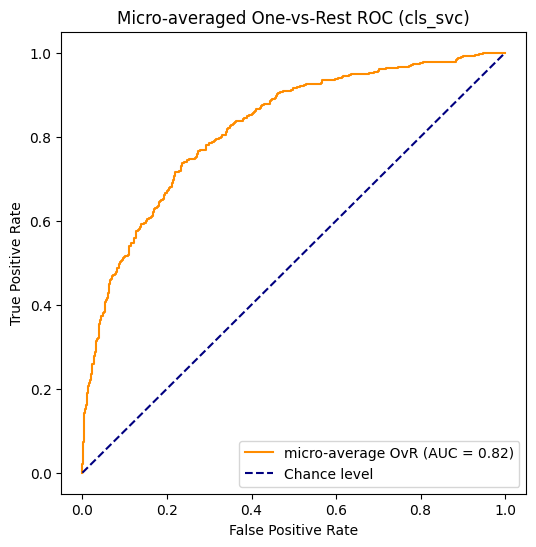

In [258]:
y_score = cls_svc.predict_proba(X_test)
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Chance level')
plt.gcf().set_size_inches(6, 6)

display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest ROC (cls_svc)",
)
plt.legend()

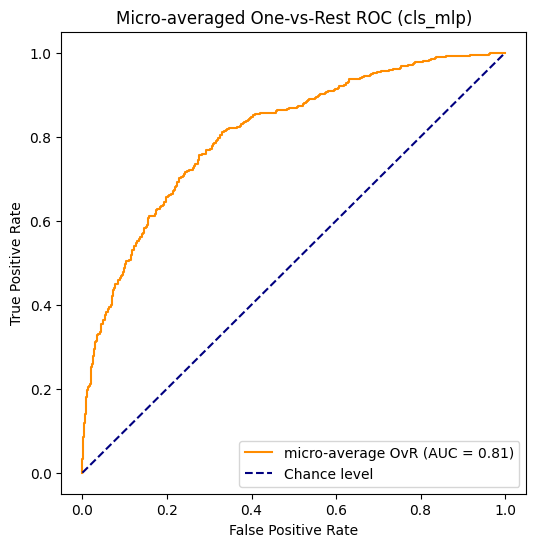

In [259]:
y_score = cls_mlp.predict_proba(X_test)
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Chance level')
plt.gcf().set_size_inches(6, 6)

display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest ROC (cls_mlp)",
)
plt.legend()

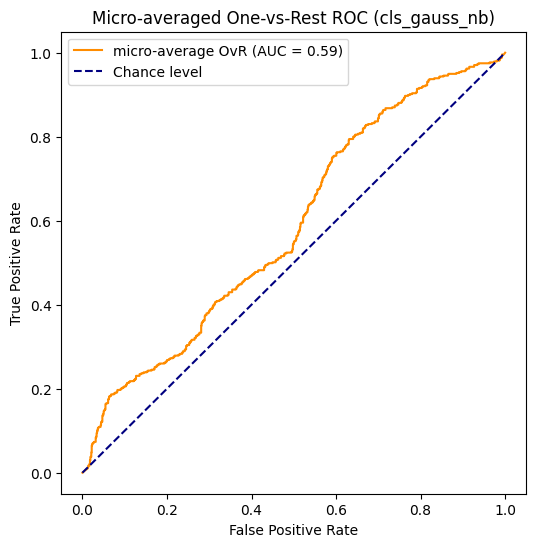

In [260]:
y_score = cls_gauss_nb.predict_proba(X_test)
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Chance level')
plt.gcf().set_size_inches(6, 6)

display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest ROC (cls_gauss_nb)",
)
plt.legend()

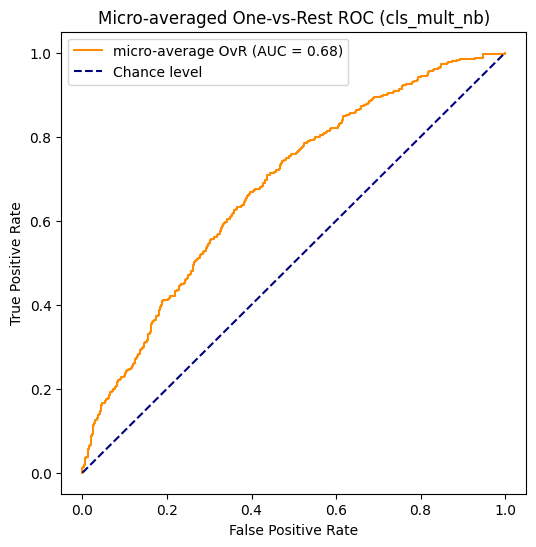

In [261]:
y_score = cls_mult_nb.predict_proba(X_test)
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Chance level')
plt.gcf().set_size_inches(6, 6)

display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest ROC (cls_mult_nb)",
)
plt.legend()

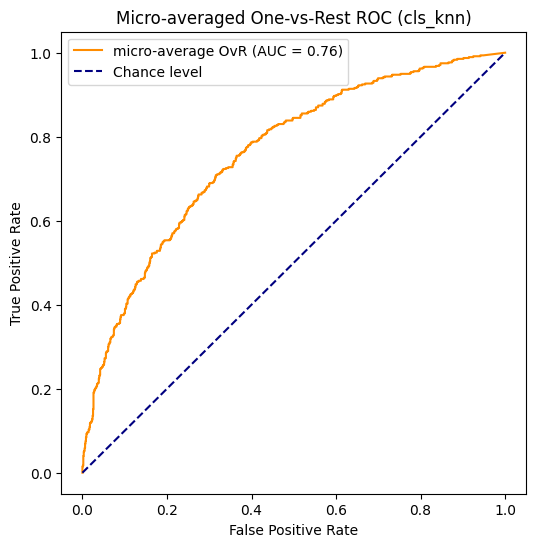

In [262]:
y_score = cls_knn.predict_proba(X_test)
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Chance level')
plt.gcf().set_size_inches(6, 6)

display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest ROC (cls_knn)",
)
plt.legend()

In [263]:
from sklearn.metrics import auc, roc_curve

In [270]:
y_score = cls_knn.predict_proba(X_test)
n_classes = 3


In [271]:
fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [272]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [273]:
fpr_grid = np.linspace(0.0, 1.0, 1000)
mean_tpr = np.zeros_like(fpr_grid)
for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])

In [274]:
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

In [275]:
target_names = target.unique()

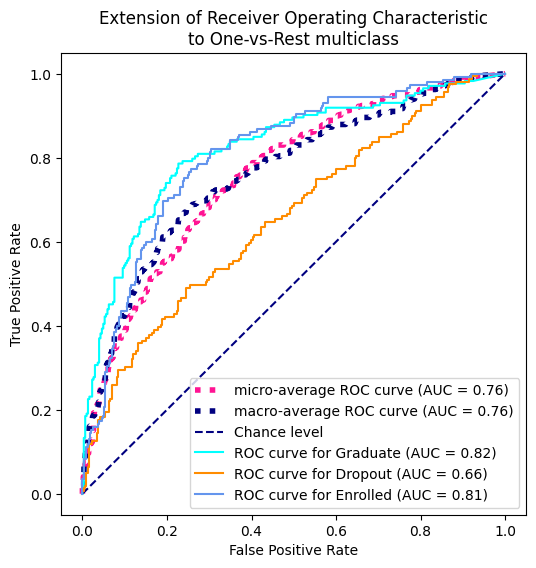

In [277]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Chance level')
plt.gcf().set_size_inches(6, 6)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "red", "violet", "blue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

# Деревья

In [289]:
from sklearn.tree import DecisionTreeClassifier

In [290]:
clf_tr_1 = DecisionTreeClassifier(max_depth=4, class_weight='balanced');

In [292]:
clf_tr_1.fit(X_train,y_train);
clf_tr_1.score(X_test,y_test)

0.6415094339622641

              precision    recall  f1-score   support

     Dropout       0.79      0.65      0.72       173
    Enrolled       0.56      0.57      0.56       159
    Graduate       0.59      0.71      0.65       145

    accuracy                           0.64       477
   macro avg       0.65      0.64      0.64       477
weighted avg       0.65      0.64      0.64       477



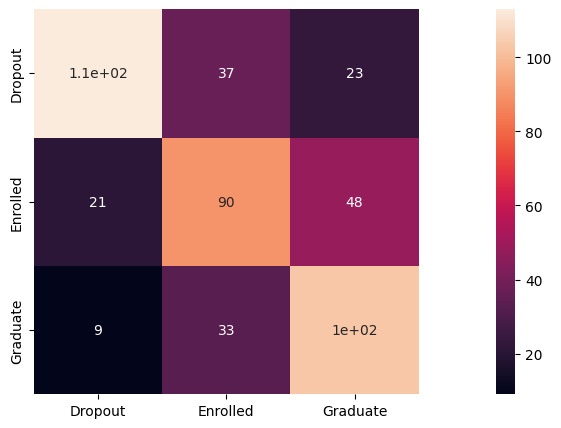

In [293]:
y_pred = clf_tr_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

In [294]:
from sklearn import tree

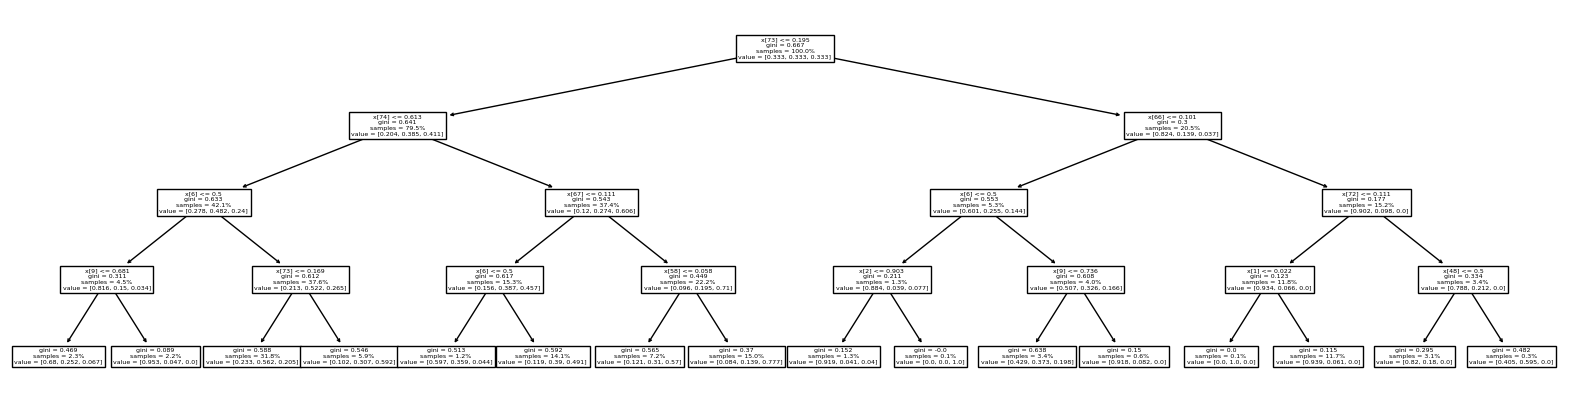

In [295]:
tree.plot_tree(clf_tr_1,proportion=True);
plt.show()

In [296]:
clf_tr_2 = DecisionTreeClassifier(random_state=42)

In [297]:
path = clf_tr_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

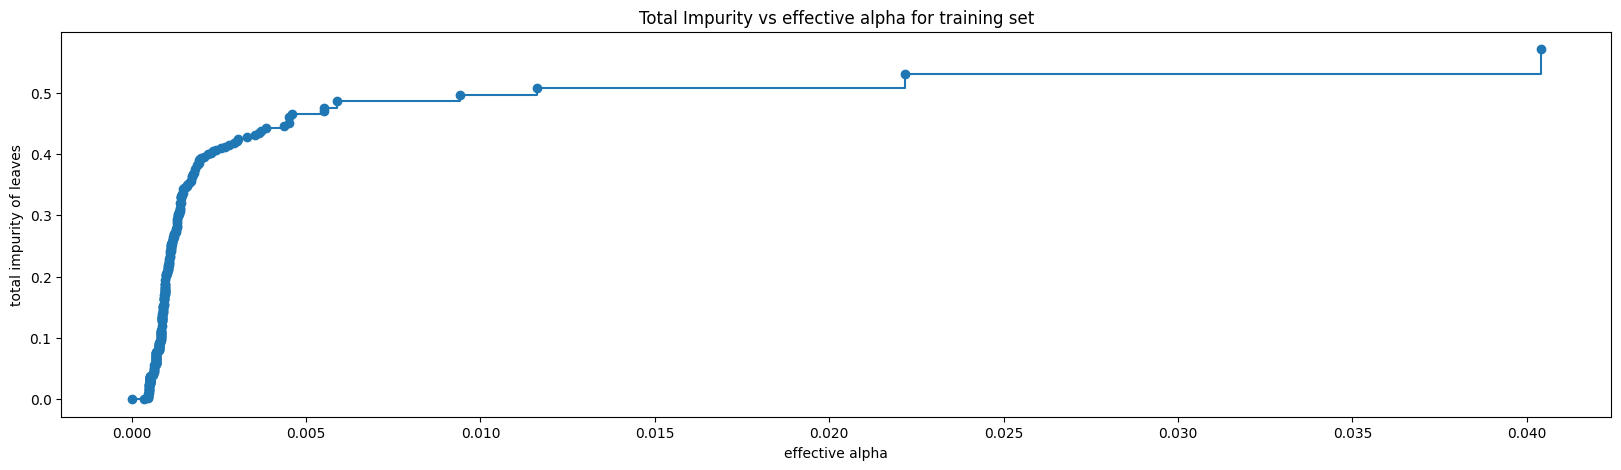

In [298]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [299]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.09598845052644822


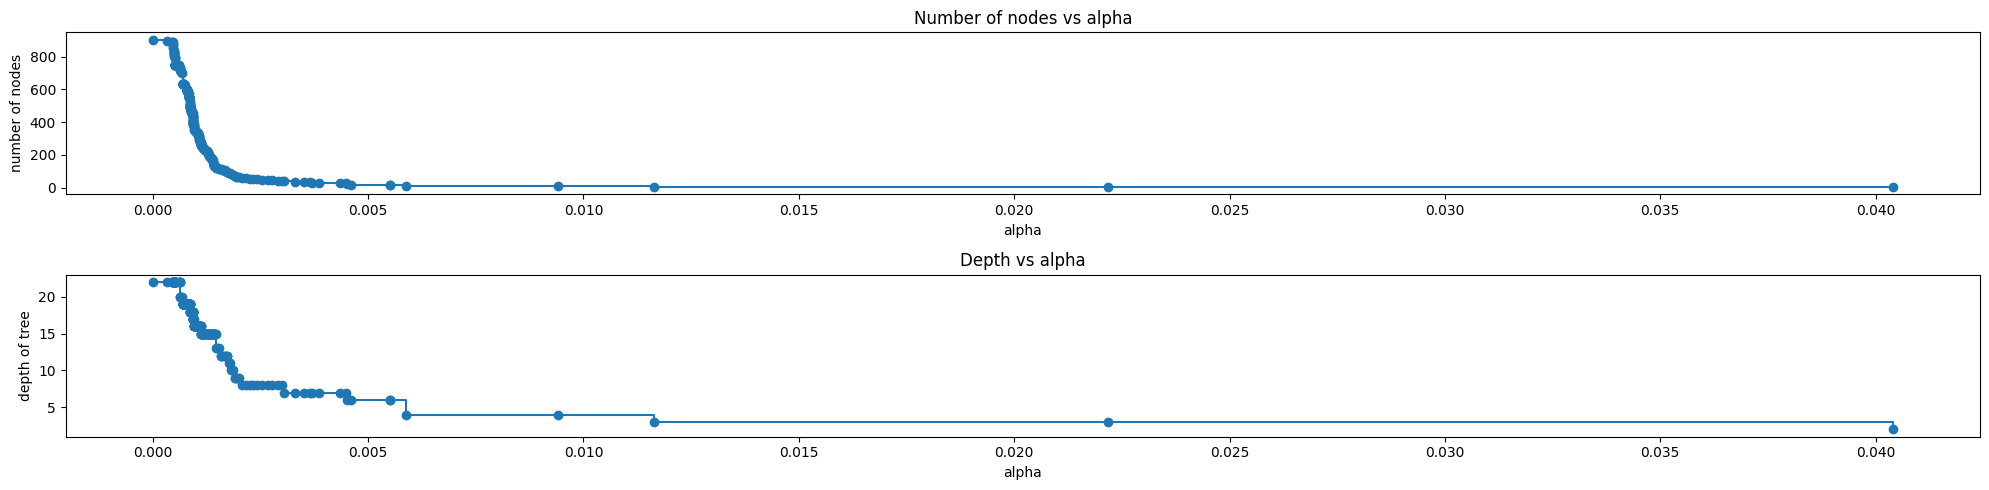

In [300]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

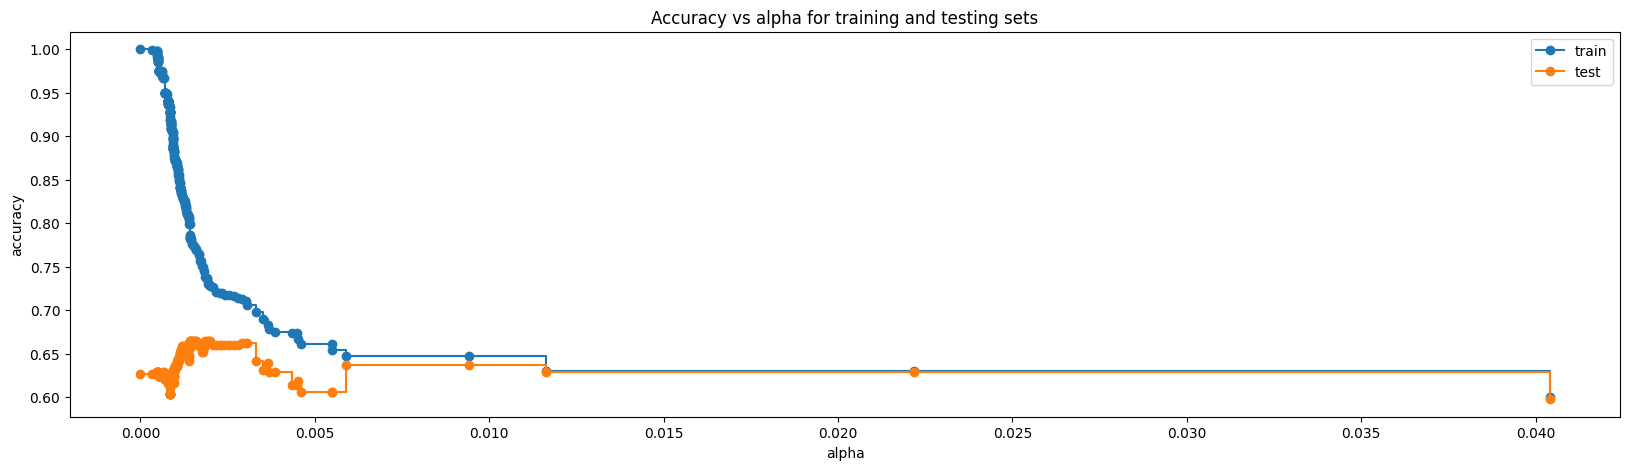

In [301]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [303]:
ind = np.argmax(test_scores)
ind

219

In [304]:
ind = np.array(range(len(test_scores)))
ind[test_scores == np.max(test_scores)]

array([219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 238, 240,
       241, 242, 243])

In [305]:
ccp_alphas[242]

0.0019687917299811217

In [306]:
clf_tr_prun = clfs[242]

              precision    recall  f1-score   support

     Dropout       0.73      0.69      0.71       173
    Enrolled       0.56      0.67      0.61       159
    Graduate       0.73      0.63      0.68       145

    accuracy                           0.66       477
   macro avg       0.68      0.66      0.67       477
weighted avg       0.68      0.66      0.67       477



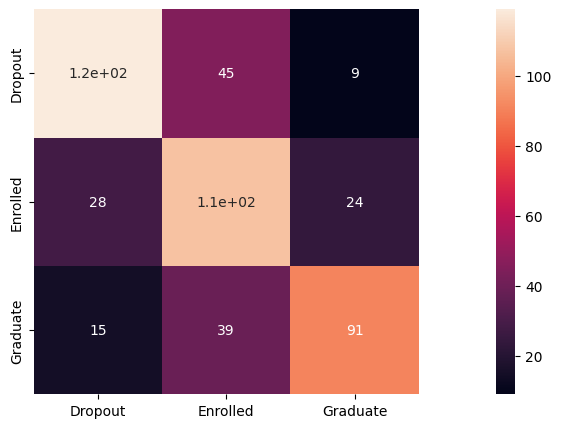

In [307]:
y_pred = clf_tr_prun.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

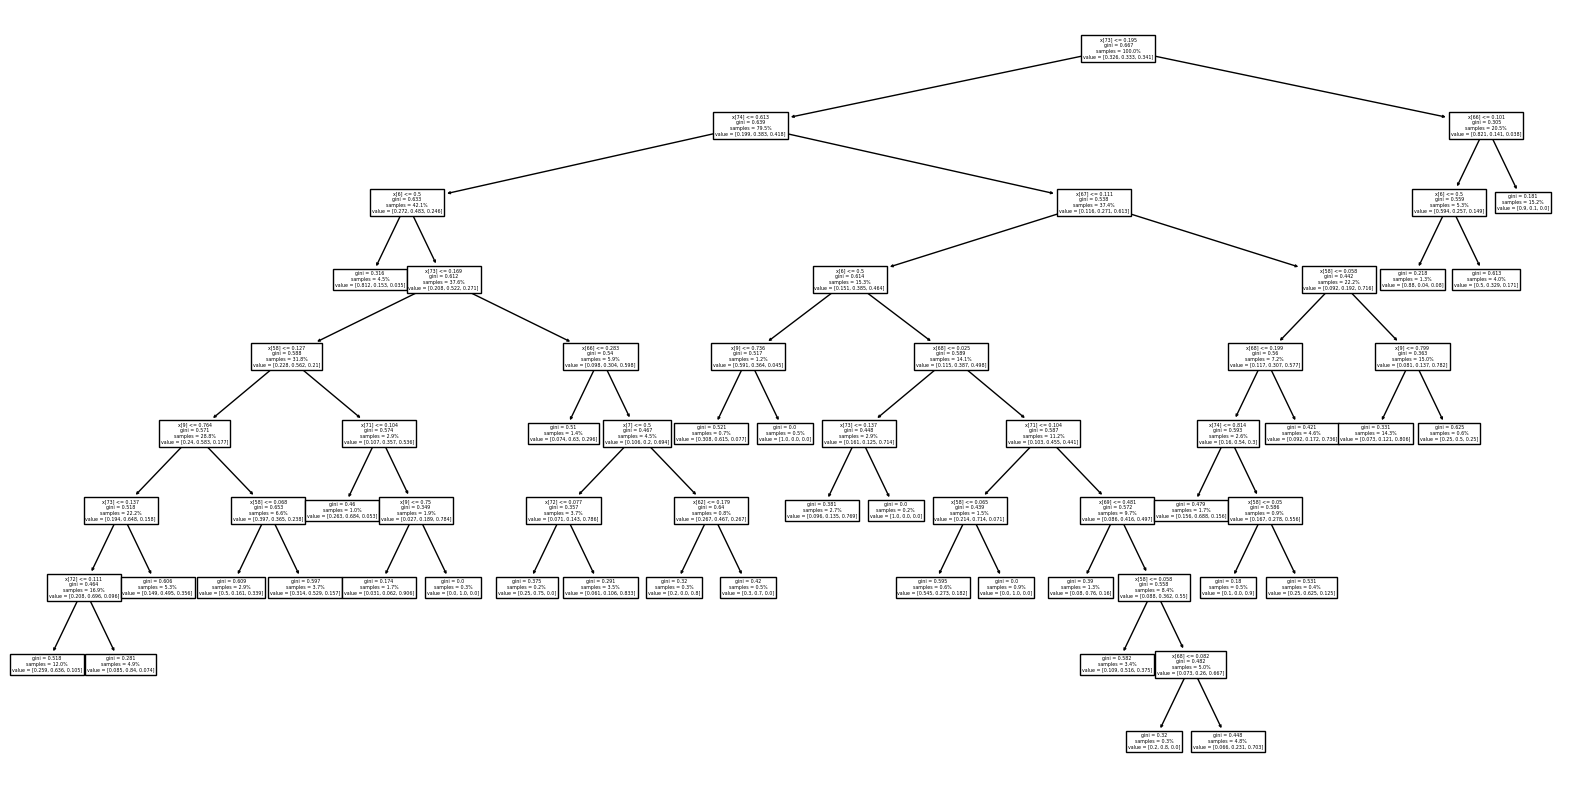

In [308]:
plt.rcParams["figure.figsize"] = (20,10)
tree.plot_tree(clf_tr_prun,proportion=True);
plt.show()

# Случайный лес

In [309]:
from sklearn.ensemble import RandomForestClassifier

In [310]:
cls_forest_1 = RandomForestClassifier()

In [311]:
cls_forest_1.fit(X_train,y_train);
cls_forest_1.score(X_test,y_test)

0.7064989517819706

              precision    recall  f1-score   support

     Dropout       0.81      0.72      0.76       173
    Enrolled       0.60      0.70      0.65       159
    Graduate       0.73      0.70      0.72       145

    accuracy                           0.71       477
   macro avg       0.71      0.71      0.71       477
weighted avg       0.72      0.71      0.71       477



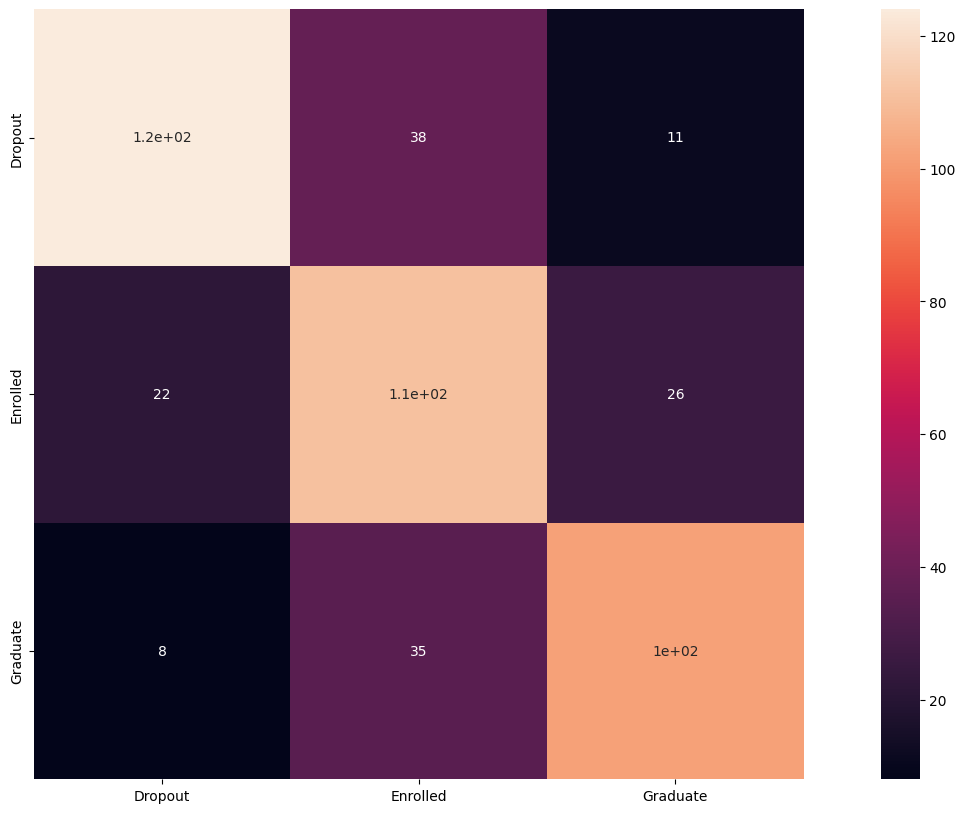

In [313]:
y_pred = cls_forest_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, xticklabels=classes, yticklabels=classes)
print(classification_report(y_test, y_pred))

In [314]:
n_nodes = sum(tree.tree_.node_count for tree in cls_forest_1.estimators_)
n_nodes

102062

In [315]:
len(cls_forest_1.estimators_)

100

In [340]:
cls_forest_2 = RandomForestClassifier(n_estimators=120, max_depth=20, class_weight='balanced')

In [341]:
cls_forest_2.fit(X_train,y_train);
cls_forest_2.score(X_test,y_test)

0.7211740041928721

In [342]:
n_nodes = sum(tree.tree_.node_count for tree in cls_forest_2.estimators_)
n_nodes

122754

In [344]:
len(cls_forest_2.estimators_)

120

# Pycaret